In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/SOCR-HeightWeight.csv')
df = df.iloc[:100,:]
df1 = df
df.head(500)

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971
...,...,...,...
95,96,70.55703,131.8001
96,97,66.28644,120.0285
97,98,63.42577,123.0972
98,99,66.76711,128.1432


In [ ]:
height_column = df1['Height(Inches)']



In [ ]:
height_column

0     65.78331
1     71.51521
2     69.39874
3     68.21660
4     67.78781
        ...   
95    70.55703
96    66.28644
97    63.42577
98    66.76711
99    68.88741
Name: Height(Inches), Length: 100, dtype: float64

In [ ]:
def convert(val):
  return val*2.54

In [ ]:
height_in_cms = height_column.apply(convert)

In [ ]:
height_in_cms

0     167.089607
1     181.648633
2     176.272800
3     173.270164
4     172.181037
         ...    
95    179.214856
96    168.367558
97    161.101456
98    169.588459
99    174.974021
Name: Height(Inches), Length: 100, dtype: float64

In [ ]:
df1['Height'] = height_in_cms


In [ ]:
df1.head()

,Index,Height(Inches),Weight(Pounds),Height
0,1,65.78331,112.9925,167.089607
1,2,71.51521,136.4873,181.648633
2,3,69.39874,153.0269,176.272800
3,4,68.21660,142.3354,173.270164
4,5,67.78781,144.2971,172.181037


In [ ]:
df1 = df1.drop('Height(Inches)', axis=1)

In [ ]:
df1.head()

,Index,Weight(Pounds),Height
0,1,112.9925,167.089607
1,2,136.4873,181.648633
2,3,153.0269,176.272800
3,4,142.3354,173.270164
4,5,144.2971,172.181037


In [ ]:
weight_column  = df1["Weight(Pounds)"]


In [ ]:
def convertweight(val):
  return val/2.205

In [ ]:
weight_in_kgs = weight_column.apply(convertweight)
df1['Weight'] = weight_in_kgs
df1.head()

,Index,Weight(Pounds),Height,Weight
0,1,112.9925,167.089607,51.243764
1,2,136.4873,181.648633,61.899002
2,3,153.0269,176.272800,69.399955
3,4,142.3354,173.270164,64.551202
4,5,144.2971,172.181037,65.440862


In [ ]:
df1 = df1.drop('Weight(Pounds)',axis=1)


In [ ]:
df1.head()

,Index,Height,Weight
0,1,167.089607,51.243764
1,2,181.648633,61.899002
2,3,176.272800,69.399955
3,4,173.270164,64.551202
4,5,172.181037,65.440862


In [ ]:
#renaming the  columns
df1.rename(columns={"Weight(Pounds)":"Weight"},inplace=True)

In [ ]:
df1.rename(columns={"Height(Inches)":"Height"},inplace=True)

In [ ]:
df1 = df1.drop('Index',axis = 1)

In [ ]:
df1.head()

,Height,Weight
0,167.089607,51.243764
1,181.648633,61.899002
2,176.272800,69.399955
3,173.270164,64.551202
4,172.181037,65.440862


Text(0, 0.5, 'Height')

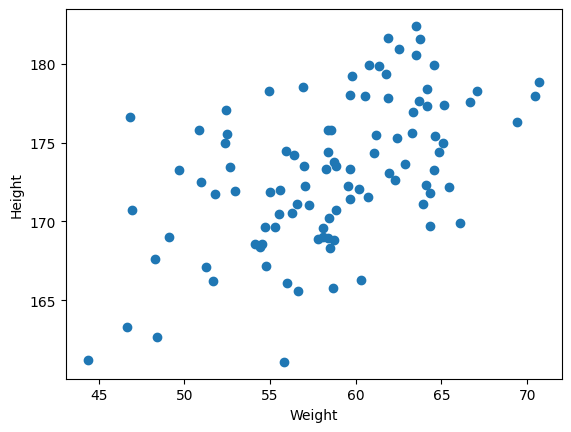

In [ ]:
##we have to check whether our dependent feature and independant are related so we are using scatter plot
##scatter plot
plt.scatter(df1['Weight'],df1['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")
#linear relationship
#we are now finding correation between x and y


In [ ]:
correlation = df1.corr()

<Axes: >

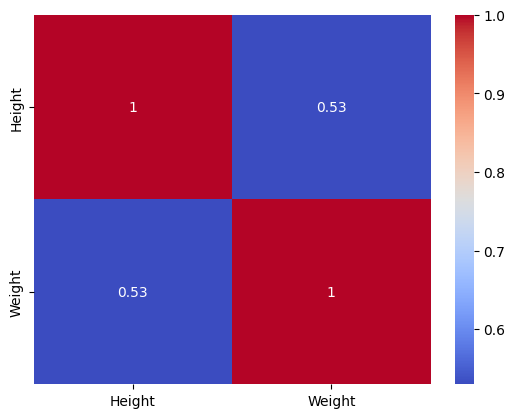

In [ ]:
import seaborn as sb
sns.heatmap(correlation, cmap='coolwarm',annot=True)

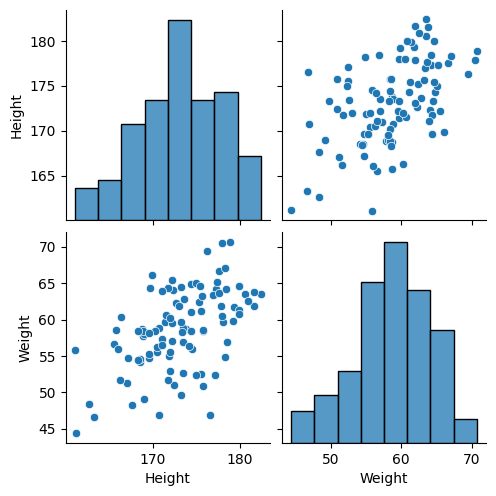

In [ ]:
##Seaborn for visualization
import seaborn as sns
sns.pairplot(df1)

In [ ]:
##Independant feature and dependant feature
#independent feature should be in a form of datafrane
#if you use dingle bracket then it iwll create a series if you use double then itll create a dataframe for you
X = df1[['Weight']] ##independant feature should be 2D araay or dataframe
##np.array(X) 2D array
y = df['Height'] #Can be in series form or maybe in 1D #output vaue is continous

In [ ]:
##Train Test Split
from sklearn.model_selection import train_test_split


In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.40,random_state=42)

In [ ]:
X_train.shape

(60, 1)

In [ ]:
#standardization
#mean=0  u & standard deviation  = 1
#Zscore = xi - mean/ standard deviation

from sklearn.preprocessing import StandardScaler

#below line will assign the formula
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)



In [ ]:
#using transofrm we are applying the same formula of mean and sd for test data
#we do this beacause we dont want our train data to know anything about test data
X_test = scaler.transform(X_test)

In [ ]:
X_test

array([[-0.2681055 ],
       [-1.51534204],
       [-0.23305424],
       [-0.28487242],
       [-2.38794768],
       [-2.36329211],
       [-3.19358837],
       [ 0.2675689 ],
       [-0.40855556],
       [-1.77131327],
       [ 0.57643275],
       [-2.68467224],
       [-2.72863947],
       [ 0.4180942 ],
       [ 0.44876287],
       [ 1.17911829],
       [ 0.64251083],
       [ 0.11036134],
       [-0.5820588 ],
       [-1.03983629],
       [ 1.51799107],
       [-1.00500181],
       [ 1.00253311],
       [ 0.74312178],
       [-0.66507344],
       [ 0.7738847 ],
       [-0.69995505],
       [-1.10817634],
       [-1.04797941],
       [ 0.8115278 ],
       [-1.66287964],
       [-1.41066895],
       [ 0.7244793 ],
       [-2.21052368],
       [-1.85153814],
       [-0.79961408],
       [ 1.00676489],
       [-2.08998846],
       [-0.286305  ],
       [-0.21527885]])

In [ ]:
#Apply simple linear regression
from sklearn.linear_model import LinearRegression

In [ ]:
#initialize the object
regression =  LinearRegression(n_jobs=-1)


In [ ]:
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [ ]:
print("Coefficient or slope",regression.coef_)
#one unit movement in weight tends to change heihgt with 2.41
print("Intercept",regression.intercept_)

Coefficient or slope [2.00806513]
Intercept 173.48746311666665


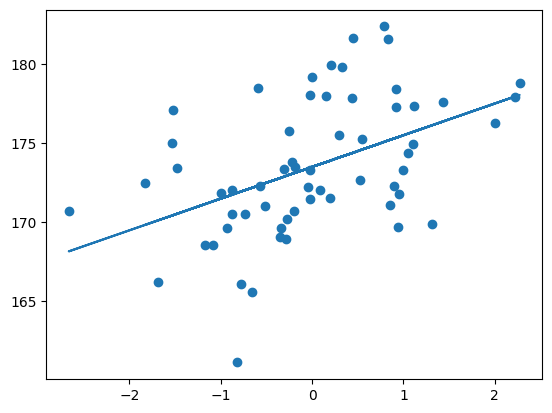

In [ ]:
#plotting best fit line for training data
plt.scatter(X_train,y_train)
#plotting predicted value along with straight line
plt.plot(X_train,regression.predict(X_train))

In [ ]:
#prediction for test data
y_pred = regression.predict(X_test)


In [ ]:
#performance matrice
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
mse  = mean_squared_error(y_test,y_pred)
mae  = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(mse)

16.537821598035993
3.399206324655853
16.537821598035993


In [ ]:
#R square
from sklearn.metrics import r2_score

In [ ]:
score  = r2_score(y_test,y_pred)
score

0.3320150793397282

In [ ]:
#adjusted r2
r2_adj =  1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
r2_adj

0.3144365287960368

In [142]:
#OLS Linear Regression
import statsmodels.api as sm

In [143]:
model = sm.OLS(y_train,X_train).fit()

In [145]:
predict  = model.predict(X_test)
print(predict)

[-0.5383733  -3.04290551 -0.4679881  -0.57204237 -4.79515447 -4.74564447
 -6.41293345  0.53729579 -0.82040618 -3.55691242  1.15751451 -5.39099672
 -5.47928577  0.83956039  0.90114508  2.36774633  1.29020358  0.22161276
 -1.16881198 -2.08805899  3.04822493 -2.01810908  2.01315177  1.49223693
 -1.33551078  1.55401088 -1.40555532 -2.22529026 -2.10441092  1.62960069
 -3.33917062 -2.83271512  1.45480162 -4.43887552 -3.71800917 -1.60567716
  2.02164948 -4.19683294 -0.5749191  -0.43229396]


In [146]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.017
Method:                 Least Squares   F-statistic:                           0.007901
Date:                Tue, 30 Jan 2024   Prob (F-statistic):                       0.929
Time:                        16:40:58   Log-Likelihood:                         -394.52
No. Observations:                  60   AIC:                                      791.0
Df Residuals:                      59   BIC:                                      793.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [148]:
#predicting for a single weight
regression.predict(scaler.transform([[72]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([178.59243487])